In [1]:
import sys
import os

import yaml

import gym
import rl_gym


sys.path.insert(0, '../Deep_RL_Implementations')



from agents.actor_critic_agents.A2C import A2C
from agents.DQN_agents.Dueling_DDQN import Dueling_DDQN
from agents.actor_critic_agents.SAC_Discrete import SAC_Discrete
from agents.actor_critic_agents.A3C import A3C
from agents.policy_gradient_agents.PPO import PPO
from agents.Trainer import Trainer
from utilities.data_structures.Config import Config
from agents.DQN_agents.DDQN import DDQN
from agents.DQN_agents.DDQN_With_Prioritised_Experience_Replay import DDQN_With_Prioritised_Experience_Replay
from agents.DQN_agents.DQN import DQN
from agents.DQN_agents.DQN_With_Fixed_Q_Targets import DQN_With_Fixed_Q_Targets


from agents.Trainer import Trainer
from utilities.data_structures.Config import Config

In [2]:
env = gym.make("CartPole-v1")
#env = gym.make("rl_gym/PuckWorld-v0", fps=60)


config = Config()
config.seed = 1
config.environment = gym.wrappers.TimeLimit(gym.make("rl_gym/PuckWorld-v0", fps=60), max_episode_steps=600) #gym.make("CartPole-v0")
config.num_episodes_to_run = 500
config.file_to_save_data_results = "../Deep_RL_Implementations/results/data_and_graphs_a/Cart_Pole_Results_Data.pkl"
config.file_to_save_results_graph = "../Deep_RL_Implementations/results/data_and_graphs_a/Cart_Pole_Results_Graph.png"
config.show_solution_score = False
config.visualise_individual_results = False
config.visualise_overall_agent_results = True
config.standard_deviation_results = 1.0
config.runs_per_agent = 1
config.use_GPU = False
config.overwrite_existing_results_file = False
config.randomise_random_seed = True
config.save_model = False


config.hyperparameters = {
    "DQN_Agents": {
        "learning_rate": 0.01,
        "batch_size": 256,
        "buffer_size": 50000,
        "epsilon": 1.0,
        "epsilon_decay_rate_denominator": 1,
        "discount_rate": 0.99,
        "tau": 0.01,
        "alpha_prioritised_replay": 0.6,
        "beta_prioritised_replay": 0.1,
        "incremental_td_error": 1e-8,
        "update_every_n_steps": 1,
        "linear_hidden_units": [128, 128],
        "final_layer_activation": "None",
        "batch_norm": False,
        "gradient_clipping_norm": 0.7,
        "learning_iterations": 1,
        "clip_rewards": False
    },
    "Stochastic_Policy_Search_Agents": {
        "policy_network_type": "Linear",
        "noise_scale_start": 1e-2,
        "noise_scale_min": 1e-3,
        "noise_scale_max": 2.0,
        "noise_scale_growth_factor": 2.0,
        "stochastic_action_decision": False,
        "num_policies": 10,
        "episodes_per_policy": 1,
        "num_policies_to_keep": 5,
        "clip_rewards": False
    },
    "Policy_Gradient_Agents": {
        "learning_rate": 0.05,
        "linear_hidden_units": [128, 128],
        "final_layer_activation": "SOFTMAX",
        "learning_iterations_per_round": 5,
        "discount_rate": 0.99,
        "batch_norm": False,
        "clip_epsilon": 0.1,
        "episodes_per_learning_round": 4,
        "normalise_rewards": True,
        "gradient_clipping_norm": 7.0,
        "mu": 0.0, #only required for continuous action games
        "theta": 0.0, #only required for continuous action games
        "sigma": 0.0, #only required for continuous action games
        "epsilon_decay_rate_denominator": 1.0,
        "clip_rewards": False
    },

    "Actor_Critic_Agents":  {

        "learning_rate": 0.005,
        "linear_hidden_units": [128, 128],
        "final_layer_activation": ["SOFTMAX", None],
        "gradient_clipping_norm": 5.0,
        "discount_rate": 0.99,
        "epsilon_decay_rate_denominator": 1.0,
        "normalise_rewards": True,
        "exploration_worker_difference": 2.0,
        "clip_rewards": False,

        "Actor": {
            "learning_rate": 0.0003,
            "linear_hidden_units": [128, 128],
            "final_layer_activation": "Softmax",
            "batch_norm": False,
            "tau": 0.005,
            "gradient_clipping_norm": 5,
            "initialiser": "Xavier"
        },

        "Critic": {
            "learning_rate": 0.0003,
            "linear_hidden_units": [128, 128],
            "final_layer_activation": None,
            "batch_norm": False,
            "buffer_size": 50000,
            "tau": 0.005,
            "gradient_clipping_norm": 5,
            "initialiser": "Xavier"
        },

        "min_steps_before_learning": 600,
        "batch_size": 256,
        "discount_rate": 0.99,
        "mu": 0.0, #for O-H noise
        "theta": 0.15, #for O-H noise
        "sigma": 0.25, #for O-H noise
        "action_noise_std": 0.2,  # for TD3
        "action_noise_clipping_range": 0.5,  # for TD3
        "update_every_n_steps": 1,
        "learning_updates_per_learning_session": 1,
        "automatically_tune_entropy_hyperparameter": True,
        "entropy_term_weight": None,
        "add_extra_noise": False,
        "do_evaluation_iterations": True
    }
}

pygame 2.1.0 (SDL 2.0.16, Python 3.8.15)
Hello from the pygame community. https://www.pygame.org/contribute.html


AGENT NAME: DQN
1.1: DQN
TITLE  rl_gym/PuckWorld
Score required to win set to infinity therefore no learning rate annealing will happen
rl_gym/PuckWorld
layer info  [128, 128, 5]
layer info  [128, 128, 5]
{'learning_rate': 0.01, 'batch_size': 256, 'buffer_size': 50000, 'epsilon': 1.0, 'epsilon_decay_rate_denominator': 1, 'discount_rate': 0.99, 'tau': 0.01, 'alpha_prioritised_replay': 0.6, 'beta_prioritised_replay': 0.1, 'incremental_td_error': 1e-08, 'update_every_n_steps': 1, 'linear_hidden_units': [128, 128], 'final_layer_activation': 'None', 'batch_norm': False, 'gradient_clipping_norm': 0.7, 'learning_iterations': 1, 'clip_rewards': False, 'output_activation': None, 'hidden_activations': 'relu', 'dropout': 0.0, 'initialiser': 'default', 'columns_of_data_to_be_embedded': [], 'embedding_dimensions': [], 'y_range': ()}
RANDOM SEED  2976747953
 Episode 500, Score: -313.97, Max score seen: -149.96, Rolling score: -318.09, Max rolling score seen: -302.76""""""""""""""""""""""""""""""""""

C:\Users\remyh\OneDrive\Documents\Projects\machine_learning\RL\Reinforcement-Learning\../Deep_RL_Implementations\agents\actor_critic_agents\SAC.py:115: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:233.)
  state = torch.FloatTensor([state]).to(self.device)


-447.68152561328037
 
----------------------------
Episode score -447.68152561328037 
----------------------------
 Episode 1, Score: -447.68, Max score seen: -447.68, Rolling score: -447.68, Max rolling score seen: -inf-802.2755541151698
 Episode 1, Score: -447.68, Max score seen: -447.68, Rolling score: -447.68, Max rolling score seen: -inf-394.1179012404057
 Episode 1, Score: -447.68, Max score seen: -447.68, Rolling score: -447.68, Max rolling score seen: -inf-512.2994864761079
 Episode 1, Score: -447.68, Max score seen: -447.68, Rolling score: -447.68, Max rolling score seen: -inf-774.2051796782024
 Episode 1, Score: -447.68, Max score seen: -447.68, Rolling score: -447.68, Max rolling score seen: -inf-261.4274645254925
 Episode 1, Score: -447.68, Max score seen: -447.68, Rolling score: -447.68, Max rolling score seen: -inf-628.5724437192265
 Episode 1, Score: -447.68, Max score seen: -447.68, Rolling score: -447.68, Max rolling score seen: -inf-322.05306255018604
 Episode 1, Scor

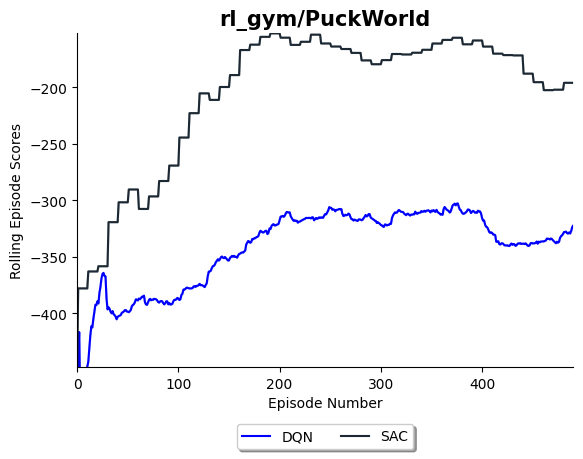

{'DQN': [[[-449.8243807501984,
    -442.75814418486533,
    -357.78723904896407,
    -648.3649835897909,
    -481.9069393741268,
    -759.7876534246275,
    -417.19180825907705,
    -487.51747823250474,
    -345.3965190074221,
    -294.88797253623056,
    -237.46525271461834,
    -393.8620083845424,
    -289.30950517992886,
    -271.7851589516792,
    -297.1394363049539,
    -427.11178703601246,
    -283.7814283757242,
    -297.9102845566175,
    -275.7431189082117,
    -397.53354405070746,
    -323.6297226240759,
    -430.65544050754994,
    -175.6530164675142,
    -253.3700778709436,
    -192.9266445598049,
    -265.68224573564294,
    -338.0265940925685,
    -440.8832930891994,
    -378.32219114203224,
    -954.4735754583207,
    -686.7414073459571,
    -338.17304460647375,
    -436.9952342399821,
    -485.0265622177678,
    -448.69973895421833,
    -329.3289054477529,
    -499.28451385953787,
    -433.3693313262935,
    -453.19191812718094,
    -496.62861057986095,
    -316.4023562

In [3]:
    #AGENTS = [SAC_Discrete, DDQN, Dueling_DDQN, DQN, DQN_With_Fixed_Q_Targets,
    #          DDQN_With_Prioritised_Experience_Replay, A2C, PPO, A3C ]
    AGENTS = [DQN, SAC_Discrete]
    trainer = Trainer(config, AGENTS)
    trainer.run_games_for_agents()